In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sqlplus import *

In [6]:
np.identity(5)

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [8]:
# prepend_header('ex1data1.csv', 'population, profit')

In [3]:
with dbopen('db') as c:
    c.write(read_csv('ex1data1.csv'), 'ex1data1')

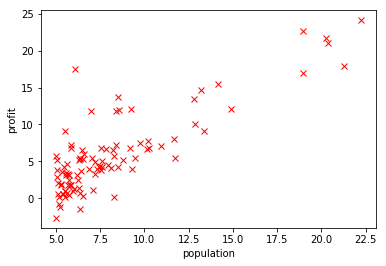

In [4]:
# plot
with dbopen('db') as c:
    data = c.rows('ex1data1')
    plt.plot(data['population'], data['profit'], 'rx')
    plt.xlabel('population')
    plt.ylabel('profit')
    plt.show()

In [45]:
def gradient_descent(X, y, theta, alpha=0.01, num_iter=1500):
    m = np.size(y)
    for _ in range(num_iter):
         theta = theta - (alpha / m) * X.T.dot(X.dot(theta) - y) 
    return theta

with dbopen('db') as c:
    data = c.rows('ex1data1')
    X = []
    for r in data:
        X.append([1, r.population])
    X = np.array(X)
    y = np.array(data['profit'])
    theta = np.array([0, 1]) 
    print(gradient_descent(X, y, theta))

[-3.6369333  1.1670296]


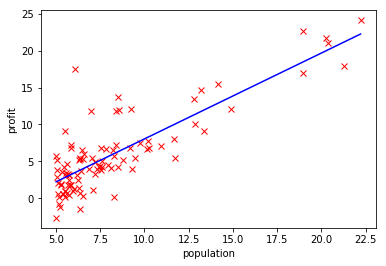

In [53]:
%matplotlib inline
# plot
with dbopen('db') as c:
    data = c.rows('ex1data1')
    x = data['population']
    y = data['profit']
    plt.plot(x, y, 'rx')
    
    theta = np.array([-3.637, 1.167])
    left, right = min(x), max(x)
    plt.plot([left, right], [theta.dot([1, left]), theta.dot([1, right])], 'b-')
    
    plt.xlabel('population')
    plt.ylabel('profit')
    plt.show()